In [1]:
# 이부분에는 코드 추가 금지!!
import os
os.chdir("../")

In [2]:
################################################################
#해당 부분은 Graph 그릴때 한글이 깨지는 문제를 해결하기 위함
from matplotlib import font_manager, rc
font_path = os.getcwd() + '\현대하모니+L.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
################################################################

import pandas_datareader as pdr
import matplotlib.ticker as ticker

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
from mplfinance.original_flavor import candlestick2_ohlc


In [13]:
kospi200_df = pd.read_csv(os.getcwd() + '\KOSPI200_Ticker.csv',encoding = 'cp949')
kospi200_df = kospi200_df.astype(str)
kospi200_df.rename(columns = {'종목코드' : 'Ticker','종목명':'Stock_symbol'},inplace = True)
kospi200_df = kospi200_df[['Ticker','Stock_symbol']].copy(deep = True)
kospi200_df['Ticker'] = kospi200_df['Ticker'].apply(lambda x : x.zfill(6))
print(kospi200_df['Stock_symbol'].unique())

['삼성전자' 'SK하이닉스' 'NAVER' '삼성바이오로직스' 'LG화학' '카카오' '삼성SDI' '현대차' '셀트리온' '기아'
 '카카오뱅크' 'POSCO' '현대모비스' '크래프톤' '삼성물산' 'SK이노베이션' 'LG전자' 'SK텔레콤' 'KB금융'
 'SK바이오사이언스' 'LG생활건강' '신한지주' 'SK' 'SK아이이테크놀로지' 'HMM' '한국전력' 'LG' '삼성생명'
 '하나금융지주' '삼성전기' '엔씨소프트' '삼성에스디에스' '포스코케미칼' 'S-Oil' '대한항공' 'KT&G' '삼성화재'
 '아모레퍼시픽' '두산중공업' '하이브' '넷마블' '고려아연' '롯데케미칼' '한온시스템' 'KT' 'SK바이오팜'
 '우리금융지주' '한화솔루션' '기업은행' '한국조선해양' 'LG디스플레이' '현대글로비스' 'SKC' 'LG유플러스' '현대제철'
 'CJ제일제당' '강원랜드' '현대건설' '금호석유' '한국타이어앤테크놀로지' '미래에셋증권' '코웨이' '현대중공업지주'
 'LG이노텍' '삼성엔지니어링' '이마트' '한국금융지주' '오리온' '한미사이언스' 'DB손해보험' '유한양행' '한진칼'
 '삼성증권' '한솔케미칼' '두산밥캣' '일진머티리얼즈' 'GS' '녹십자' '아모레G' '쌍용C&E' 'KCC' '효성첨단소재'
 '삼성중공업' '삼성카드' '팬오션' '한국가스공사' 'CJ대한통운' 'GS건설' 'NH투자증권' '롯데지주' '한화시스템'
 '한미약품' '호텔신라' '메리츠증권' 'GS리테일' 'SK케미칼' '에스원' 'OCI' '한국항공우주' '신풍제약' '효성티앤씨'
 '씨에스윈드' '키움증권' '두산퓨얼셀' '만도' 'BGF리테일' '롯데쇼핑' '동서' 'CJ' '대우건설' '포스코인터내셔널'
 '한화생명' '코오롱인더' '대우조선해양' 'BNK금융지주' 'DL이앤씨' '현대로템' '현대미포조선' '신세계' '한샘'
 '휠라홀딩스' '한화에어로스페이스' '제일기획' '효성' 'DB하이텍' '한화' '롯데정밀화학' '하이트진로' 

In [14]:
target = kospi200_df[kospi200_df['Stock_symbol']=='넥센타이어']
target

,Ticker,Stock_symbol
188,002350,넥센타이어


In [15]:
Ticker_number = target['Ticker'].to_string(header = False,index = False)
Stock_Symbol = target['Stock_symbol'].to_string(header = False,index = False)
start = datetime.datetime(2021,5,30)
end = datetime.datetime(2021,9,18)

In [16]:
table = pdr.naver.NaverDailyReader(Ticker_number,start,end).read()
table.tail(10)

table = table.astype(int)
x_date = table.index.astype(str)

D:\Jupyter\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Jupyter\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Jupyter\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Jupyter\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Jupyter\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Jupyter\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45349 missing from current font.
  fon

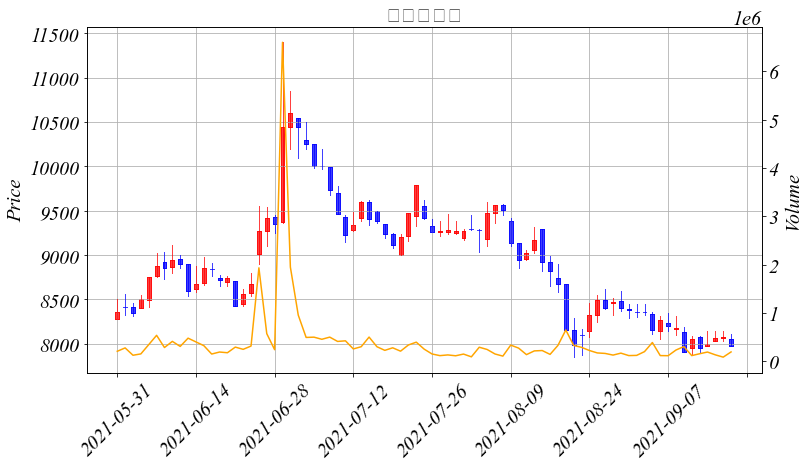

In [17]:
fig, ax = plt.subplots()

ax.plot(x_date,[numpy.nan for _ in range(len(x_date))])

candlestick2_ohlc(ax,table['Open'],table['High'],table['Low'],table['Close'],width=0.5,colorup='r',colordown='b')
plt.xticks(rotation=45)
plt.grid()





first_chart_color = 'black'
first_chart_xlabel_color = 'black'
first_chart_ylabel_color = 'black'


second_chart_color = 'orange'
second_chart_xlabel_color = 'black'
second_chart_ylabel_color = 'black'


ax2 = ax.twinx()
ax2.set_xscale('linear')

ax2.plot(x_date,table.Volume,color = second_chart_color)



ax.xaxis.set_major_locator(ticker.AutoLocator())

plt.title(Stock_Symbol,fontsize=20)
ax.set_ylabel('Price',color = first_chart_xlabel_color)
ax2.set_ylabel('Volume',color = first_chart_ylabel_color)



fig.tight_layout()
fig.set_size_inches(15,10,forward=True)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20 
plt.rcParams['font.style'] = 'oblique'


plt.show()



# 이평선

In [18]:
ma5 = table['Close'].rolling(window = 5).mean()
ma10 = table['Close'].rolling(window = 10).mean()
ma30 = table['Close'].rolling(window = 30).mean()

table.insert(len(table.columns),"MA5",ma5)
table.insert(len(table.columns),"MA10",ma10)
table.insert(len(table.columns),"MA30",ma30)


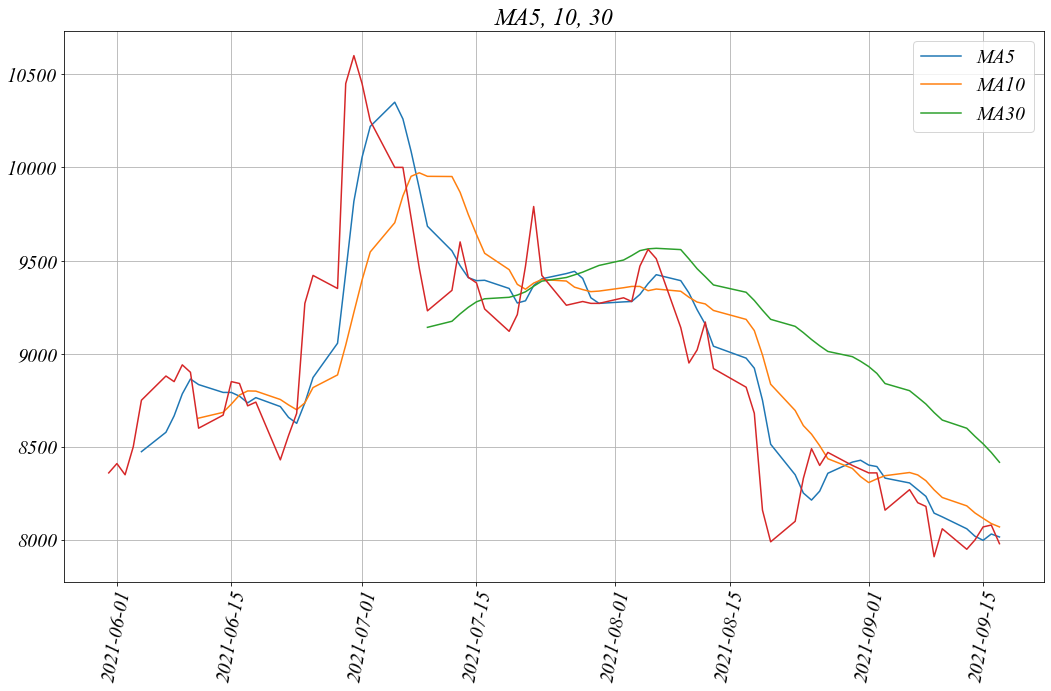

In [19]:
plt.figure(figsize=(15,10))
plt.plot(table[['MA5','MA10','MA30']],label=["MA5","MA10","MA30"])
plt.plot(table.index,table['Close'])
plt.legend(loc = 'best')
plt.xticks(rotation=80)
plt.title('MA5, 10, 30')

plt.tight_layout()


plt.grid()
plt.show()

In [10]:
# 추가 설명 (Yahoo Finance에서 종목코드 찾기)

# https://finance.yahoo.com에 접속해서
# 검색창에 희망하는 기업 영문명 입력
# 아래 기업 영문명 좌측 코드가 종목코드
#####
#Ticker = 종목코드
#www.krx.co.kr 에서 종목코드를 다운 받을 수 있음.